# Integrated Simulations

In [1]:
# To manipulate arrays
import pandas as pd
import pathlib
import sys
import numpy as np
from pathlib import Path
import tifffile
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt 
# Plotting
current_dir = pathlib.Path().absolute()
rsnaped_dir = current_dir.parents[0].joinpath('rsnaped')
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp

In [2]:

# Deffining directories
#video_dir = current_dir.parents[0].joinpath('DataBases','CAP_IRES')
#video_dir = current_dir.parents[0].joinpath('DataBases','test_will')
#video_dir = current_dir.parents[0].joinpath('DataBases','12xSun-KDM5B___1xFLAG-12xSun-AlexX')
#/home/luisub/Desktop/rsnaped/DataBases/20231026_FlagKDM5bMS2_translation/20231026_2
#video_dir = current_dir.parents[0].joinpath('DataBases','20231026_2')
video_dir = current_dir.parents[0].joinpath('DataBases','20231026_9')

#video_dir = current_dir.parents[0].joinpath('DataBases','20231026_FlagKDM5bMS2_translation','20231026_9')
#video_dir = current_dir.parents[0].joinpath('DataBases','20231026_FlagKDM5bMS2_translation','20231026_12')
#video_dir = current_dir.parents[0].joinpath('DataBases','20231026_FlagKDM5bMS2_translation','20231026_16')


#video_dir = current_dir.parents[0].joinpath('DataBases','KDM5B_translation_samplemovies_correct_format')
#video_dir = current_dir.parents[0].joinpath('DataBases','Hela')


In [3]:
# Load videos 
path_files, list_files_paths, list_videos, num_videos = rsp.Utilities.read_files_in_directory(directory=video_dir, extension_of_files_to_look_for = 'tif',return_images_in_list=True)
print(list_videos[0].shape) # T,Z,C,Y,X

(100, 9, 2, 512, 512)


In [4]:
list_files_paths[0]

'Cell02.tif'

In [5]:

video = np.max(list_videos[0],axis=1)
print(video.shape)  # T, C, Y,X

# convert to shape T,Y,X,C
video_transposed = rsp.ConvertToStandardFormat(video, time_position= 0, height_position = 2,  width_position= 3, channel_position= 1 ).transpose_video()
#video_transposed = np.transpose(video, (0,2,3,1))
print(video_transposed.shape)

(100, 2, 512, 512)
The video has been transposed to the format [T, Y, X, C] and the channels are RGB
(100, 512, 512, 3)


In [6]:
#max_frames_to_read = 10
#list_videos[0] = list_videos[0][0:max_frames_to_read,:,:,:]

In [7]:
#for i,vid in enumerate(list_videos):
#    rsp.Plots.plot_image_channels(vid,selected_time_point = 0)

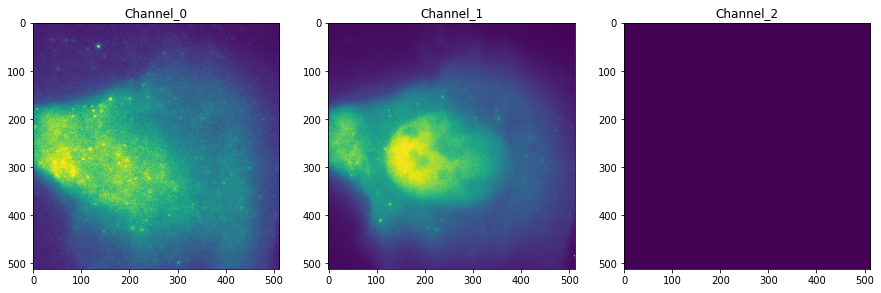

In [8]:
rsp.Plots.plot_image_channels(video_transposed,selected_time_point = 10)
list_videos_transposed = [video_transposed]

In [9]:
# make a new directory with correct format
video_dir_std = Path(video_dir,'standard_format')
video_dir_std.mkdir(exist_ok=True)

# save as a tif file
tifffile.imsave(str(video_dir_std.joinpath('std_'+list_files_paths[0])), video_transposed, metadata={'axes': 'TYXC'})

In [10]:
120*0.05

6.0

# Tracking

In [29]:
selected_channel_tracking = 0
selected_channel_segmentation = 1
intensity_calculation_method = 'disk_donut'  # options are : 'total_intensity' and 'disk_donut' 'gaussian_fit'
mask_selection_method = 'all_cells_in_image'           # options are : 'all_cells_in_image', 'max_spots' and 'max_area' 
use_optimization_for_tracking = 1            # 0 not using, 1 is using optimization
min_percentage_time_tracking = 0.01            # (normalized) minimum time to consider a trajectory.
particle_detection_size =   11               # spot size for the simulation and tracking.
#selected_channel = 0                         # Selected channel for tracking
average_cell_diameter = 300                    # cell diameter
intensity_threshold_tracking = None          # intensity threshold. If None, the code uses automatic detection # 
real_positions_dataframe = None #pd.read_csv(video_dir.joinpath('both_base_pb_KDM5B_P300_0.06_5.33333_video_cell_0.csv'))

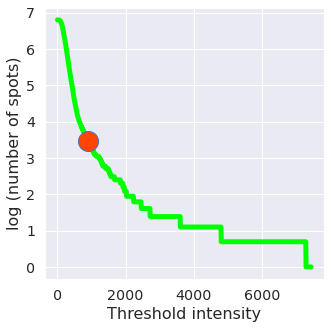

The number of detected trajectories is:  698
The selected intensity threshold is:  896.0 



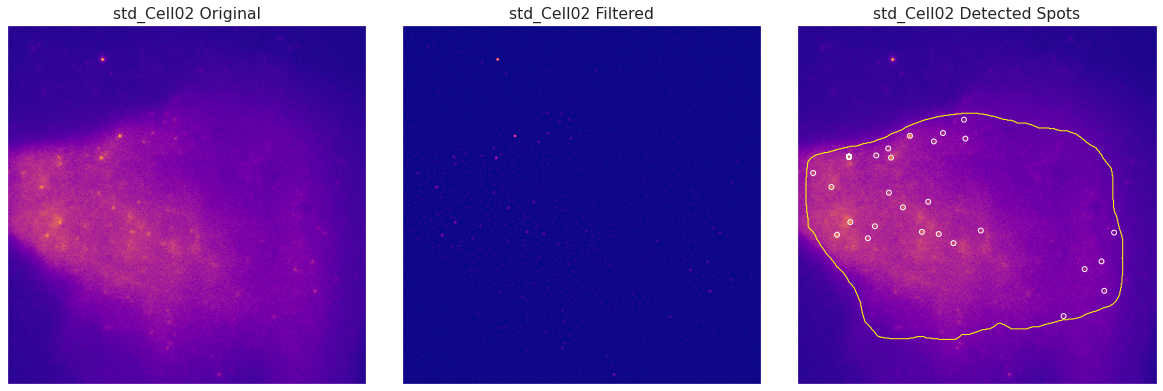

In [30]:
particle_detection_size = 9                 # spot size for the simulation and tracking.

list_DataFrame_tracking, list_array_intensities, list_time_vector, list_selected_mask = rsp.image_processing( files_dir_path_processing=video_dir_std,
                                                                                                            particle_size=particle_detection_size,
                                                                                                            selected_channel_tracking = selected_channel_tracking,
                                                                                                            selected_channel_segmentation = selected_channel_segmentation,
                                                                                                            intensity_calculation_method =intensity_calculation_method, 
                                                                                                            mask_selection_method = mask_selection_method,
                                                                                                            show_plot=True,
                                                                                                            use_optimization_for_tracking=use_optimization_for_tracking,
                                                                                                            real_positions_dataframe = real_positions_dataframe,
                                                                                                            average_cell_diameter=average_cell_diameter,
                                                                                                            print_process_times=False,
                                                                                                            min_percentage_time_tracking=min_percentage_time_tracking,
                                                                                                            dataframe_format='long')

In [31]:
df =list_DataFrame_tracking[0]

In [14]:
df.head()

,image_number,cell_number,particle,frame,ch0_int_mean,ch1_int_mean,ch2_int_mean,ch0_int_std,ch1_int_std,ch2_int_std,...,y,ch0_SNR,ch1_SNR,ch2_SNR,ch0_bg_int_mean,ch1_bg_int_mean,ch2_bg_int_mean,ch0_bg_int_std,ch1_bg_int_std,ch2_bg_int_std
0,0,0,0,0,207.85,33.07,0.0,301.39,401.23,0.0,...,295,1.19,0.09,NaN,2238.58,5706.61,0.0,174.28,381.47,0.0
1,0,0,0,1,106.15,77.31,0.0,269.08,419.20,0.0,...,294,0.54,0.19,NaN,2311.62,5773.91,0.0,195.45,408.30,0.0
2,0,0,0,2,98.38,104.13,0.0,238.37,394.02,0.0,...,294,0.50,0.25,NaN,2246.21,5840.35,0.0,195.41,421.00,0.0
3,0,0,0,4,80.58,-0.77,0.0,233.76,361.20,0.0,...,291,0.38,-0.00,NaN,2295.38,5732.25,0.0,211.88,409.20,0.0
4,0,0,0,6,123.53,40.47,0.0,235.83,362.54,0.0,...,292,0.66,0.10,NaN,2235.68,5663.90,0.0,187.48,389.95,0.0


In [15]:
df.tail()

,image_number,cell_number,particle,frame,ch0_int_mean,ch1_int_mean,ch2_int_mean,ch0_int_std,ch1_int_std,ch2_int_std,...,y,ch0_SNR,ch1_SNR,ch2_SNR,ch0_bg_int_mean,ch1_bg_int_mean,ch2_bg_int_mean,ch0_bg_int_std,ch1_bg_int_std,ch2_bg_int_std
1587,0,0,63,95,-42.69,58.85,0.0,148.44,319.05,0.0,...,283,-0.28,0.13,NaN,2126.67,5588.43,0.0,153.41,445.45,0.0
1588,0,0,63,96,0.50,-11.77,0.0,164.79,362.71,0.0,...,283,0.00,-0.03,NaN,2074.12,5519.01,0.0,160.96,405.85,0.0
1589,0,0,63,97,-5.14,95.02,0.0,189.56,341.62,0.0,...,282,-0.03,0.20,NaN,2113.09,5326.89,0.0,180.27,481.71,0.0
1590,0,0,63,98,-65.30,76.04,0.0,133.69,373.33,0.0,...,280,-0.42,0.17,NaN,2097.00,5461.32,0.0,156.40,452.43,0.0
1591,0,0,63,99,-43.27,45.12,0.0,184.09,340.56,0.0,...,278,-0.24,0.10,NaN,2146.21,5507.67,0.0,182.74,429.85,0.0


In [27]:
def plot_scatter_spots_cell_size(x,y,plot_title,selected_color = '#1C00FE',xlabel='',ylabel=''):
    r, p = stats.pearsonr(x, y)
    df_join_distribution = pd.DataFrame({'X':x,'Y':y})
    #plt.figure(figsize=(6,5))
    sns.set(font_scale = 1.3)
    b = sns.jointplot(data=df_join_distribution, y='Y', x='X', color= selected_color , marginal_kws=dict(bins=40, rug=True))
    b.plot_joint(sns.rugplot, height=0, color=[0.7,0.7,0.7], clip_on=True)
    b.plot_joint(sns.kdeplot, color=[0.5,0.5,0.5], levels=5)
    b.plot_joint(sns.regplot,scatter_kws={'color': 'orangered',"s":10, 'marker':'o'}, line_kws={'color': selected_color,'lw': 2} )
    blank_plot, = b.ax_joint.plot([], [], linestyle="", alpha=0)
    b.ax_joint.legend([blank_plot],['r={:.2f}'.format( np.round(r,2))],loc='upper left',)
    b.ax_joint.set_xlim(np.percentile(x,1), np.percentile(x,99))
    b.ax_joint.set_ylim(np.percentile(y,1), np.percentile(y,99))
    b.fig.suptitle(plot_title)
    b.ax_joint.set_xlabel(xlabel)
    b.ax_joint.set_ylabel(ylabel)
    b.ax_joint.collections[0].set_alpha(0)
    b.fig.tight_layout()
    b.fig.subplots_adjust(top=0.92) 
    #name_plot = plot_title +'.pdf'  
    #plt.savefig(name_plot, transparent=False,dpi=1200, bbox_inches = 'tight', format='pdf')
    plt.show()
    #pathlib.Path().absolute().joinpath(name_plot).rename(pathlib.Path().absolute().joinpath(destination_folder,name_plot))
    return

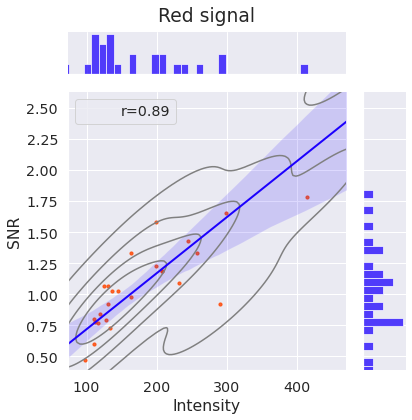

In [32]:

# Scatter plots intensity comparing all channels # ch1_bg_int_std #ch1_SNR
SNR = rsp.Utilities.extract_field_from_dataframe(dataframe=df,selected_time=0,selected_field='ch0_SNR')
intensity = rsp.Utilities.extract_field_from_dataframe(dataframe=df,selected_time=0,selected_field='ch0_int_mean')
plot_scatter_spots_cell_size(intensity,SNR,plot_title='Red signal',selected_color = '#1C00FE',xlabel='Intensity',ylabel='SNR')

(array([2.000e+00, 1.000e+00, 1.000e+01, 1.000e+01, 1.100e+01, 1.400e+01,
        4.200e+01, 2.500e+01, 3.300e+01, 4.800e+01, 4.700e+01, 6.800e+01,
        5.000e+01, 6.400e+01, 4.897e+03, 6.900e+01, 5.400e+01, 5.000e+01,
        6.900e+01, 3.000e+01, 3.400e+01, 4.200e+01, 2.300e+01, 3.100e+01,
        1.900e+01, 1.700e+01, 2.000e+01, 1.300e+01, 1.300e+01, 2.500e+01]),
 array([-0.49      , -0.45666667, -0.42333333, -0.39      , -0.35666667,
        -0.32333333, -0.29      , -0.25666667, -0.22333333, -0.19      ,
        -0.15666667, -0.12333333, -0.09      , -0.05666667, -0.02333333,
         0.01      ,  0.04333333,  0.07666667,  0.11      ,  0.14333333,
         0.17666667,  0.21      ,  0.24333333,  0.27666667,  0.31      ,
         0.34333333,  0.37666667,  0.41      ,  0.44333333,  0.47666667,
         0.51      ]),
 <BarContainer object of 30 artists>)

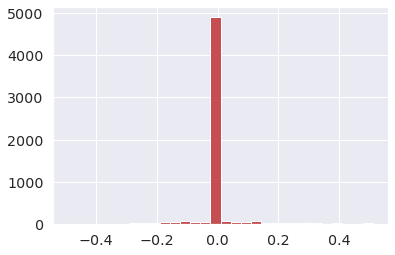

In [24]:
number_bins = 30
selected_color = 'r'
SNR = rsp.Utilities.extract_field_from_dataframe(dataframe=df,selected_time=None,selected_field='ch0_SNR').flatten()

plt.hist(SNR, bins = number_bins, range=(0.01,0.01),color = selected_color, orientation = 'vertical')

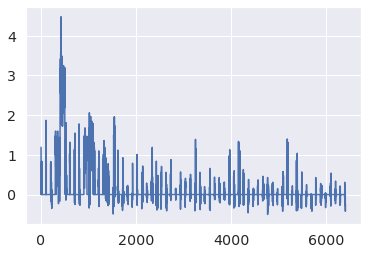

In [19]:
plt.plot(SNR)